In [2]:
import torch
import torchvision
from torchvision.transforms import ToTensor

transform = ToTensor()
train_dataset = torchvision.datasets.FashionMNIST("../data", True,transform, download=True)
test_dataset = torchvision.datasets.FashionMNIST("../data", False,transform, download=True)
classes = train_dataset.classes

print( "size train:",len(train_dataset)," test:",len(test_dataset))
train_dataset[0][0].shape

size train: 60000  test: 10000


torch.Size([1, 28, 28])

'Ankle boot'

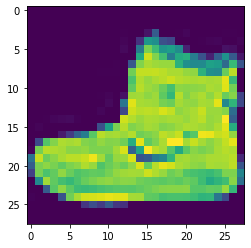

In [3]:
import matplotlib.pyplot as plt

plt.imshow(train_dataset[0][0].reshape(28,28,1))
classes[train_dataset[0][1]]

In [11]:
from torch import nn

net = nn.Sequential(
    nn.Conv2d(1, 6, kernel_size=5, padding=2),
    nn.BatchNorm2d(6),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, padding=2),
    nn.BatchNorm2d(16),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    nn.Flatten(),
    nn.Linear(16*7*7, 120),
    nn.ReLU(),
    nn.Linear(120, 84),
    nn.ReLU(),
    nn.Linear(84, len(classes))
)


X = torch.ones(64, 1, 28, 28)
print("Input\t", X.shape, sep="")
for layer in net:
    print(layer.__class__.__name__, end="\t")
    X = layer(X)
    print(X.shape)


Input	torch.Size([64, 1, 28, 28])
Conv2d	torch.Size([64, 6, 28, 28])
BatchNorm2d	torch.Size([64, 6, 28, 28])
ReLU	torch.Size([64, 6, 28, 28])
MaxPool2d	torch.Size([64, 6, 14, 14])
Conv2d	torch.Size([64, 16, 14, 14])
BatchNorm2d	torch.Size([64, 16, 14, 14])
ReLU	torch.Size([64, 16, 14, 14])
MaxPool2d	torch.Size([64, 16, 7, 7])
Flatten	torch.Size([64, 784])
Linear	torch.Size([64, 120])
ReLU	torch.Size([64, 120])
Linear	torch.Size([64, 84])
ReLU	torch.Size([64, 84])
Linear	torch.Size([64, 10])


In [14]:
from torch.utils.data import DataLoader
from time import time

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size, True, num_workers = 3)
test_loader = DataLoader(test_dataset, 128, True, num_workers = 3)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr = 1e-3)

def eval(net, dataloader, device):
    training = net.training
    net.eval()
    corrects, total = 0 , 0
    for X, y in dataloader:
        with torch.no_grad():
            X, y = X.to(device), y.to(device)
            y_hat = net(X)
            corrects += (y==y_hat.argmax(-1)).sum().item()
            total += len(y)
    net.train(training)
    return corrects / total

def train(net, trainloader, testloader, optimizer, criterion, device):
    corrects, losses, total = 0, 0, 0
    net.to(device)
    net.train()
    for X, y in trainloader:
        X,y  = X.to(device), y.to(device)
        optimizer.zero_grad()
        y_hat = net(X)
        l = criterion(y_hat, y)
        l.backward()
        optimizer.step()
        
        corrects+= (y_hat.argmax(-1)==y).sum().item()
        losses += l.item()
        total += len(y)
    val_acc = eval(net, testloader, device)
    return losses/len(trainloader), corrects/total, val_acc

epochs = 20
for i in range(epochs):
    start = time()
    l, train_acc, test_acc = train(net, train_loader, test_loader, optimizer, criterion, torch.device("cuda"))

    print(f"epoch {i+1}/{epochs} time({(time()-start):.2f}secs): loss {l:.3f}, train accuracy: {train_acc*100:.1f}, test accuracy: {test_acc*100:.1f}")

epoch 1/20 time(7.61secs): loss 0.058, train accuracy: 97.7, test accuracy: 90.3
epoch 2/20 time(7.29secs): loss 0.056, train accuracy: 97.9, test accuracy: 90.0
epoch 3/20 time(7.55secs): loss 0.053, train accuracy: 98.0, test accuracy: 90.3
epoch 4/20 time(7.59secs): loss 0.048, train accuracy: 98.2, test accuracy: 89.3
epoch 5/20 time(7.56secs): loss 0.047, train accuracy: 98.2, test accuracy: 90.3
epoch 6/20 time(7.28secs): loss 0.042, train accuracy: 98.4, test accuracy: 89.8
epoch 7/20 time(7.56secs): loss 0.044, train accuracy: 98.4, test accuracy: 90.0
epoch 8/20 time(7.44secs): loss 0.039, train accuracy: 98.6, test accuracy: 89.7
epoch 9/20 time(7.70secs): loss 0.039, train accuracy: 98.5, test accuracy: 89.5
epoch 10/20 time(7.51secs): loss 0.035, train accuracy: 98.7, test accuracy: 90.1
epoch 11/20 time(7.82secs): loss 0.036, train accuracy: 98.6, test accuracy: 89.3
epoch 12/20 time(7.79secs): loss 0.029, train accuracy: 98.9, test accuracy: 90.0
epoch 13/20 time(7.84secs